In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from statistics import mean 
import statistics as stat

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as sm

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Gurwinder Singh/numeric data/archive.zip")

In [ ]:
df


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
df.shape

(400, 9)

In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


CHECKING CORELATION THAT WHICH FEAUTRE IS MORE DEPENDENT ON OUR TARGET 

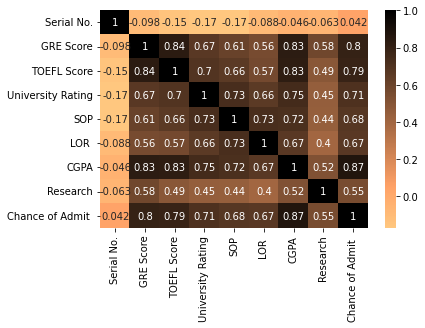

In [ ]:
sns.heatmap(df.corr(),annot = True, cmap = 'copper_r')

defining X independant feautres 

In [ ]:
X = df.iloc[:,1:-2]

In [ ]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21
...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04
396,325,107,3,3.0,3.5,9.11
397,330,116,4,5.0,4.5,9.45
398,312,103,3,3.5,4.0,8.78


 defining Y dependant feautres  WHAT WE WANT TO PREDICT 

In [ ]:
y = df.iloc[:,-1]

In [ ]:
y


0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 6)
(80, 6)
(320,)
(80,)


FUNCTION FOR TRAINING MODEL

In [ ]:
def train_model(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
    print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2))  
    print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
    print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))
    print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))   
    print('Training Score:',round(model.score(X_train,y_train),2))
    print('Testing Score:',round(model.score(X_test,y_test),2))


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFC=RandomForestRegressor(n_estimators=300,criterion='mse',max_depth=50)
train_model(RFC)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Mean absolute error = 0.05
Mean squared error = 0.01
Median absolute error = 0.04
Explain variance score = 0.76
R2 score = 0.76
Training Score: 0.97
Testing Score: 0.76


KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=40)
train_model(KNN)

Mean absolute error = 0.07
Mean squared error = 0.01
Median absolute error = 0.05
Explain variance score = 0.66
R2 score = 0.65
Training Score: 0.72
Testing Score: 0.65


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTC=DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=50)
train_model(DTC)


Mean absolute error = 0.07
Mean squared error = 0.01
Median absolute error = 0.05
Explain variance score = 0.61
R2 score = 0.6
Training Score: 1.0
Testing Score: 0.6


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


SVR

In [ ]:
from sklearn.svm import SVR
SC=SVR(kernel='linear',C=1)
train_model(SC)

Mean absolute error = 0.06
Mean squared error = 0.01
Median absolute error = 0.04
Explain variance score = 0.77
R2 score = 0.76
Training Score: 0.79
Testing Score: 0.76


LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
Linear = LinearRegression()
Linear.fit(X_train, y_train)
train_model(Linear)

Mean absolute error = 0.05
Mean squared error = 0.01
Median absolute error = 0.03
Explain variance score = 0.77
R2 score = 0.77
Training Score: 0.81
Testing Score: 0.77


Model Evaluation Scores 

In [ ]:
res={'DT':DTC.score(X_test,y_test),"KNN":KNN.score(X_test,y_test),
'SVM':SC.score(X_test,y_test),"RFC":RFC.score(X_test,y_test),'LR':Linear.score(X_test,y_test)}
print(res)

{'DT': 0.6030294406700576, 'KNN': 0.6527716217124857, 'SVM': 0.7558424997853885, 'RFC': 0.7618845403636009, 'LR': 0.7696358982277595}


Evaluation GRAPH 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """Entry point for launching an IPython kernel.


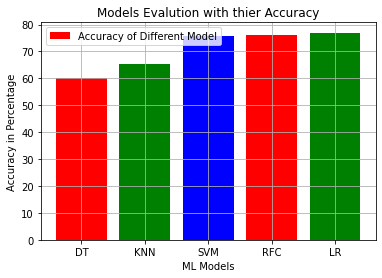

In [ ]:
plt.bar(res.keys(),[i*100 for i in res.values()],label='Accuracy of Different Model', color= "rgb")
plt.xlabel('ML Models')
plt.ylabel('Accuracy in Percentage')
plt.title('Models Evalution with thier Accuracy')
plt.grid()
plt.legend()
plt.show()

saving model file ofline


In [ ]:
import joblib

In [ ]:
# import pickle
# filename = 'Linear_Model_AK'
# pickle.dump(Linear, open(filename, 'wb'))

In [ ]:
joblib.dump('/content/drive/MyDrive/Saved_Model',Linear,'Linear_model_Ak')

ValueError: ignored